In [1]:
from model import load_model
from image_utils import imagenet_utils
import cv2 ,matplotlib.pyplot as plt
import numpy as np

In [2]:
test=load_model('VGG16')
model=test.model
input_dim=test.input_dim
layer_name='block5_conv3'
orig_img,img=imagenet_utils.load_test_img("both.png")
# orig_img,img=imagenet_utils.load_test_img('ILSVRC2012_img_val/ILSVRC2012_val_00000178.JPEG')
# orig_img,img=imagenet_utils.load_test_img("dog.jpg")

from explanation_models import gradcam,gradcam_robust,gradcam_plusplus,guided_backprop

In [3]:
# 281: 'tabby, tabby cat',
# 282: 'tiger cat',
#  242: 'boxer',
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

In [4]:
import tensorflow as tf
print(tf.keras.applications.vgg16.decode_predictions(model.predict(img), top=5))
print(np.argmax(model.predict(img)))

[[('n02108089', 'boxer', 0.42014065), ('n02108422', 'bull_mastiff', 0.28162318), ('n02123159', 'tiger_cat', 0.053449746), ('n02129604', 'tiger', 0.050134733), ('n02109047', 'Great_Dane', 0.04980786)]]
242


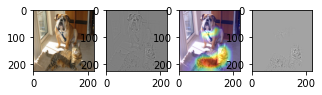

In [5]:
g1 = guided_backprop(model,layer_name,input_dim)
guided_bp=g1.get_heatmap(img)
g= gradcam(model,layer_name,input_dim)
heatmap=g.get_heatmap(img,242,True)
heatmap_colormap,overlayed_img=imagenet_utils.overlay_heatmap(orig_img,heatmap)
heatmap_colormap, combined =imagenet_utils.combine_guided_bp(orig_img, heatmap, guided_bp)
f, axarr = plt.subplots(1,4)
axarr[0].imshow(orig_img)
axarr[1].imshow(guided_bp, cmap=plt.cm.gray)
axarr[2].imshow(overlayed_img)
axarr[3].imshow(combined, cmap=plt.cm.gray)

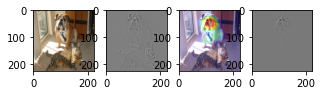

In [6]:

heatmap2=g.get_heatmap(img,282,True)
heatmap_colormap2,overlayed_img2=imagenet_utils.overlay_heatmap(orig_img,heatmap2)
heatmap_colormap2, combined2 =imagenet_utils.combine_guided_bp(orig_img, heatmap2, guided_bp)
f, axarr = plt.subplots(1,4)

axarr[0].imshow(orig_img)
axarr[1].imshow(guided_bp, cmap=plt.cm.gray)
axarr[2].imshow(overlayed_img2)
axarr[3].imshow(combined2, cmap=plt.cm.gray)

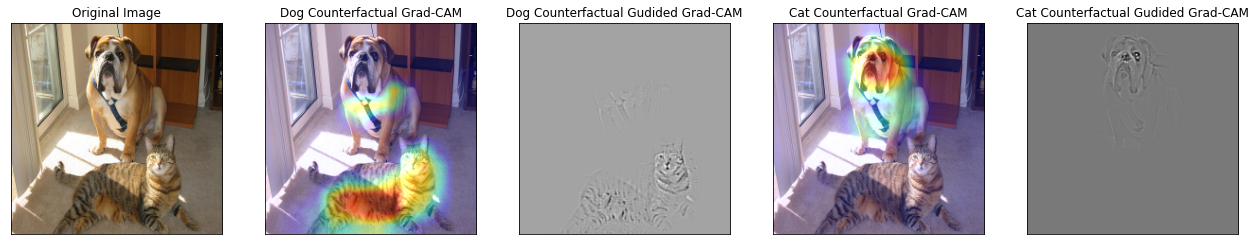

In [7]:
f, axarr = plt.subplots(1,5)
f = plt.gcf()
f.set_size_inches(22,15)
for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])
axarr[0].imshow(orig_img)
axarr[0].title.set_text('Original Image')
axarr[1].imshow(overlayed_img)
axarr[1].title.set_text('Dog Counterfactual Grad-CAM')
axarr[2].imshow(combined, cmap=plt.cm.gray)
axarr[2].title.set_text('Dog Counterfactual Gudided Grad-CAM')
axarr[3].imshow(overlayed_img2)
axarr[3].title.set_text('Cat Counterfactual Grad-CAM')
axarr[4].imshow(combined2, cmap=plt.cm.gray)
axarr[4].title.set_text('Cat Counterfactual Gudided Grad-CAM')
plt.savefig('Results/CounterFactExp.jpeg', dpi=200)